In [2]:
import pandas as pd 
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [6]:
movies = pd.read_csv("C:\\Users\\hp\\Desktop\\associatioon rule\\my_movies.csv")

In [7]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [8]:
df = pd.get_dummies(movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [12]:
frequent_itemsets = apriori (df, min_support = 0.1, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Harry Potter1, V3_Harry Potter1, V5_LOTR2, Gr..."
1393,0.1,"(V3_Harry Potter1, LOTR2, V5_LOTR2, Green Mile..."
1394,0.1,"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO..."
1395,0.1,"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO..."


In [13]:
rules= association_rules(frequent_itemsets,metric = 'lift', min_threshold =0.7)
rules
#rules.sort_values('lift', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
64247,(Sixth Sense),"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64248,(V1_Sixth Sense),"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(LOTR1),"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(V4_Green Mile),"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [14]:
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Harry Potter1, Sixth Sense, V5_LOTR2, Green M...","(V3_Harry Potter1, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42207,"(Harry Potter1, V1_Sixth Sense, V2_LOTR1, Gree...","(V5_LOTR2, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42195,"(Harry Potter1, LOTR2, LOTR1, Green Mile)","(V2_LOTR1, V1_Sixth Sense, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42196,"(Harry Potter1, V2_LOTR1, LOTR2, Green Mile)","(V1_Sixth Sense, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42197,"(Harry Potter1, V1_Sixth Sense, LOTR2, LOTR1)","(Green Mile, V5_LOTR2, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42198,"(Harry Potter1, V1_Sixth Sense, LOTR2, V2_LOTR1)","(Green Mile, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42199,"(Harry Potter1, LOTR2, LOTR1, V2_LOTR1)","(Green Mile, V1_Sixth Sense, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42200,"(Harry Potter1, V1_Sixth Sense, V5_LOTR2, Gree...","(V2_LOTR1, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42201,"(Harry Potter1, V5_LOTR2, LOTR1, Green Mile)","(V2_LOTR1, V1_Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42202,"(Harry Potter1, V2_LOTR1, V5_LOTR2, Green Mile)","(V1_Sixth Sense, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [15]:
rules.sort_values('lift', ascending = False)[:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Harry Potter1, Sixth Sense, V5_LOTR2, Green M...","(V3_Harry Potter1, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42207,"(Harry Potter1, V1_Sixth Sense, V2_LOTR1, Gree...","(V5_LOTR2, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42195,"(Harry Potter1, LOTR2, LOTR1, Green Mile)","(V2_LOTR1, V1_Sixth Sense, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42196,"(Harry Potter1, V2_LOTR1, LOTR2, Green Mile)","(V1_Sixth Sense, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42197,"(Harry Potter1, V1_Sixth Sense, LOTR2, LOTR1)","(Green Mile, V5_LOTR2, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42198,"(Harry Potter1, V1_Sixth Sense, LOTR2, V2_LOTR1)","(Green Mile, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42199,"(Harry Potter1, LOTR2, LOTR1, V2_LOTR1)","(Green Mile, V1_Sixth Sense, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42200,"(Harry Potter1, V1_Sixth Sense, V5_LOTR2, Gree...","(V2_LOTR1, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42201,"(Harry Potter1, V5_LOTR2, LOTR1, Green Mile)","(V2_LOTR1, V1_Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42202,"(Harry Potter1, V2_LOTR1, V5_LOTR2, Green Mile)","(V1_Sixth Sense, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [16]:
rules[rules.lift<2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
62205,(Sixth Sense),"(V3_Harry Potter1, LOTR2, V5_LOTR2, Green Mile...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
62213,"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
62716,(Sixth Sense),"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
63234,"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf


In [17]:
rules[rules.lift>9]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
124,(V1_Harry Potter1),(Harry Potter2),0.1,0.1,0.1,1.0,10.0,0.09,inf
125,(Harry Potter2),(V1_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
126,(V2_Harry Potter2),(Harry Potter2),0.1,0.1,0.1,1.0,10.0,0.09,inf
127,(Harry Potter2),(V2_Harry Potter2),0.1,0.1,0.1,1.0,10.0,0.09,inf
132,(V2_LOTR),(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
...,...,...,...,...,...,...,...,...,...
64240,"(V2_LOTR1, LOTR1)","(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",0.1,0.1,0.1,1.0,10.0,0.09,inf
64241,"(V2_LOTR1, V4_Green Mile)","(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",0.1,0.1,0.1,1.0,10.0,0.09,inf
64243,(V3_Harry Potter1),"(Harry Potter1, LOTR2, V5_LOTR2, Green Mile, S...",0.1,0.1,0.1,1.0,10.0,0.09,inf
64245,(V5_LOTR2),"(Harry Potter1, V3_Harry Potter1, LOTR2, Green...",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [18]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,1
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,1
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,1
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,1
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,1
...,...,...,...,...,...,...,...,...,...,...
64247,(Sixth Sense),"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1
64248,(V1_Sixth Sense),"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1
64249,(LOTR1),"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1
64250,(V4_Green Mile),"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1


In [23]:
rules[ (rules['antecedent_len'] >= 8) &
       (rules['confidence']> 0.50) &
       (rules['lift']> 9) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
58130,"(Harry Potter1, V3_Harry Potter1, LOTR2, Green...",(V2_LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf,8
58137,"(Harry Potter1, LOTR2, Green Mile, Sixth Sense...",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf,8
58640,"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",(V2_LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf,8
58645,"(Harry Potter1, V3_Harry Potter1, LOTR2, Green...",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf,8
58647,"(Harry Potter1, LOTR2, V5_LOTR2, Green Mile, S...",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf,8
...,...,...,...,...,...,...,...,...,...,...
63280,"(V3_Harry Potter1, V5_LOTR2, LOTR2, Green Mile...","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,8
63281,"(V3_Harry Potter1, V5_LOTR2, LOTR2, Sixth Sens...","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,8
63282,"(V3_Harry Potter1, LOTR2, Green Mile, Sixth Se...","(Harry Potter1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,8
63283,"(V3_Harry Potter1, V5_LOTR2, Green Mile, Sixth...","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,8


In [24]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,1
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,1
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,1
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,1
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1
...,...,...,...,...,...,...,...,...,...,...
64247,(Sixth Sense),"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1
64248,(V1_Sixth Sense),"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1
64249,(LOTR1),"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1
64250,(V4_Green Mile),"(Harry Potter1, V3_Harry Potter1, LOTR2, V5_LO...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1


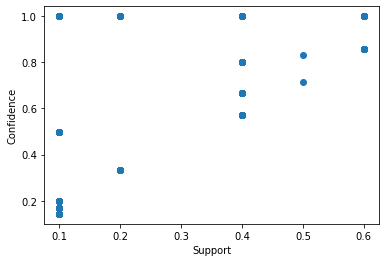

In [25]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [26]:
frequent_itemsets = apriori(df,min_support=.150,use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))

In [27]:
rules1=association_rules(frequent_itemsets,metric = 'lift' ,min_threshold=0.9)

In [28]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
649,(Sixth Sense),"(V3_Sixth Sense, Gladiator, Patriot, V2_Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(Gladiator),"(V3_Sixth Sense, Sixth Sense, Patriot, V2_Patr...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
651,(Patriot),"(V3_Sixth Sense, Sixth Sense, Gladiator, V2_Pa...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(V2_Patriot),"(V3_Sixth Sense, Sixth Sense, Gladiator, Patri...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


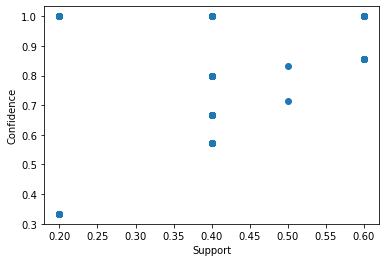

In [29]:
import matplotlib.pyplot as plt
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()